### Autorzy:
    
    1. Bartosz Durys 229869.
    2. Szymon Klewicki 229911.

# Temat: Efektywność drużyn NBA

## Wykorzystamy następujące zbiory danych:

### 1.	NBA games data

Z zestawu danych “NBA games data” (https://www.kaggle.com/datasets/nathanlauga/nba-games) wybieramy następujące pliki CSV:

·	teams.csv – dane identyfikujące dotyczące każdej analizowanej drużyny,

·	games.csv – statystyki meczy dla dwóch rozgrywających drużyn.

## 2. NBA Injuries from 2010-2020

Zestaw danych “NBA Injuries from 2010-2020” (https://www.kaggle.com/datasets/ghopkins/nba-injuries-2010-2018) składa się z pojedynczego pliku CSV:

·	injuries_2010-2020.csv – dane dotyczące urazu każdego z zawodników wraz z podaniem pełnej nazwy drużyny zawodnika.

### 3. NBA Head Coaches

Wybieramy jeden plik CSV z zestawu danych “NBA Head Coaches” (https://www.kaggle.com/datasets/jacobbaruch/nba-head-coaches):

·	NBA_coach_of_the_year.csv – lista najlepszych trenerów dla każdego roku z zakresu wraz ze statystykami i nazwą drużyny.

### 4. NBA Top Shot Moment List

Ten zestaw danych (https://www.kaggle.com/datasets/itrussell15/nba-top-shot-moment-list) zawiera pojedynczy plik CSV:

·	series_info_final.csv – zbiór najlepszych momentów z rozgrywek NBA z wyszczególnieniem drużyny i zawodnika oraz oceną rzadkości momentu.

## Pytania

1. Jaki jest procent zwycięstw dla każdej drużyny w każdym roku?
2. Jak wygląda rozkład średniej liczby punktów przypadających na mecz przez każdą z drużyn w każdym sezonie?
3. Jakie drużyny odniosły najmniej urazów w ustalonym zakresie lat?
4. Ile razy drużyna posiadała trenera, który dostał się na tabelę trenera roku?
5. Ile przypadało momentów dla każdej drużyny w każdym roku?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Ładowanie zestawów danych

In [2]:
# NBA games data https://www.kaggle.com/datasets/nathanlauga/nba-games
teams_csv = 'teams.csv'
games_csv = 'games.csv'

# NBA Injuries from 2010-2020 https://www.kaggle.com/datasets/ghopkins/nba-injuries-2010-2018
injuries_csv = 'injuries_2010-2020.csv'

# NBA Head Coaches https://www.kaggle.com/datasets/jacobbaruch/nba-head-coaches
coach_year_csv = 'NBA_coach_of_the_year.csv'

# NBA Top Shot Moment List https://www.kaggle.com/datasets/itrussell15/nba-top-shot-moment-list
top_shot_moments_csv = 'series_info_final.csv'

In [3]:
teams_df = pd.read_csv(teams_csv)
games_df = pd.read_csv(games_csv)
injuries_df = pd.read_csv(injuries_csv)
coach_year_df = pd.read_csv(coach_year_csv)
top_moments_df = pd.read_csv(top_shot_moments_csv)

# Wybór kolumn

Dla każdej tabeli (DataFrame) wybierzemy wymagany przez nas podzbiór kolumn

## teams_df

In [4]:
teams_df

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
5,0,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce


In [5]:
teams_df = teams_df[['TEAM_ID', 'ABBREVIATION', 'NICKNAME', 'HEADCOACH']]
teams_df

,TEAM_ID,ABBREVIATION,NICKNAME,HEADCOACH
0,1610612737,ATL,Hawks,Lloyd Pierce
1,1610612738,BOS,Celtics,Brad Stevens
2,1610612740,NOP,Pelicans,Alvin Gentry
3,1610612741,CHI,Bulls,Jim Boylen
4,1610612742,DAL,Mavericks,Rick Carlisle
5,1610612743,DEN,Nuggets,Michael Malone
6,1610612745,HOU,Rockets,Mike D'Antoni
7,1610612746,LAC,Clippers,Doc Rivers
8,1610612747,LAL,Lakers,Frank Vogel
9,1610612748,MIA,Heat,Erik Spoelstra


## games_df

In [6]:
games_df

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
25792,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
25793,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
25794,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [7]:
games_df = games_df[['HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'PTS_home', 'PTS_away', 'HOME_TEAM_WINS']]
games_df

,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,PTS_away,HOME_TEAM_WINS
0,1610612748,1610612750,2021,104.0,113.0,0
1,1610612741,1610612739,2021,101.0,91.0,1
2,1610612759,1610612754,2021,108.0,119.0,0
3,1610612744,1610612749,2021,122.0,109.0,1
4,1610612743,1610612761,2021,115.0,127.0,0
...,...,...,...,...,...,...
25791,1610612737,1610612740,2014,93.0,87.0,1
25792,1610612741,1610612764,2014,81.0,85.0,0
25793,1610612747,1610612743,2014,98.0,95.0,1
25794,1610612761,1610612758,2014,99.0,94.0,1


## injuries_df

In [8]:
injuries_df

,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)
...,...,...,...,...,...
27100,2020-09-30,Lakers,Dion Waiters,NaN,activated from IL
27101,2020-10-02,Heat,NaN,Bam Adebayo,strained neck (DTD)
27102,2020-10-02,Heat,NaN,Goran Dragic,placed on IL with torn plantar fascia in left ...
27103,2020-10-02,Heat,Chris Silva,NaN,activated from IL


In [9]:
injuries_df = injuries_df[['Date', 'Team']]
injuries_df

,Date,Team
0,2010-10-03,Bulls
1,2010-10-06,Pistons
2,2010-10-06,Pistons
3,2010-10-08,Blazers
4,2010-10-08,Nets
...,...,...
27100,2020-09-30,Lakers
27101,2020-10-02,Heat
27102,2020-10-02,Heat
27103,2020-10-02,Heat


## coach_year_df

In [10]:
coach_year_df

,Year,Coach,Team,W-L,Playoffs W-L,Career W-L,Exp [Years],W,L,Playoffs W,Playoffs L,Career W,Career L,Born,Birthplace,College,Overall Record
0,2020.0,Nick Nurse,Toronto Raptors,53-19,4-0,114-45,1,53,19,4.0,0.0,114.0,45.0,"July 24, 1967","Carroll, IA",NaN,114 - 45
1,2019.0,Mike Budenholzer,Milwaukee Bucks,60-22,10-5,329-236,6,60,22,10.0,5.0,329.0,236.0,"August 6, 1969","Holbrook, AZ",NaN,329 - 236
2,2018.0,Dwane Casey,Toronto Raptors,59-23,4-6,434-394,10,59,23,4.0,6.0,434.0,394.0,"April 17, 1957","Indianapolis, IN",NaN,434 - 394
3,2017.0,Mike D'Antoni,Houston Rockets,55-27,6-5,672-527,15,55,27,6.0,5.0,672.0,527.0,"May 8, 1951","Mullens, WV",NaN,672 - 527
4,2016.0,Steve Kerr,Golden State Warriors,73-9,15-9,337-138,5,73,9,15.0,9.0,337.0,138.0,"September 27, 1965",--,University of Arizona,337 - 138
5,2015.0,Mike Budenholzer,Atlanta Hawks,60-22,8-8,329-236,6,60,22,8.0,8.0,329.0,236.0,"August 6, 1969","Holbrook, AZ",NaN,329 - 236
6,2014.0,Gregg Popovich,San Antonio Spurs,62-20,16-7,1277-614,23,62,20,16.0,7.0,1277.0,614.0,"January 28, 1949","East Chicago, IN",NaN,1277 - 614
7,2013.0,George Karl,Denver Nuggets,57-25,2-4,1175-824,27,57,25,2.0,4.0,1175.0,824.0,"May 12, 1951","Penn Hills, PA",NaN,1175 - 824
8,2012.0,Gregg Popovich,San Antonio Spurs,50-16,10-4,1277-614,23,50,16,10.0,4.0,1277.0,614.0,"January 28, 1949","East Chicago, IN",NaN,1277 - 614
9,2011.0,Tom Thibodeau,Chicago Bulls,62-20,9-7,352-246,8,62,20,9.0,7.0,352.0,246.0,--,--,NaN,352 - 246


In [11]:
coach_year_df = coach_year_df[['Year', 'Coach']]
coach_year_df

,Year,Coach
0,2020.0,Nick Nurse
1,2019.0,Mike Budenholzer
2,2018.0,Dwane Casey
3,2017.0,Mike D'Antoni
4,2016.0,Steve Kerr
5,2015.0,Mike Budenholzer
6,2014.0,Gregg Popovich
7,2013.0,George Karl
8,2012.0,Gregg Popovich
9,2011.0,Tom Thibodeau


## top_moments_df

In [12]:
top_moments_df

,Unnamed: 0,Moment Type,Link,Moment Date,Team,Lowest Ask,Num Listings,Moment Rarity,Edition Size,Limited Edition,Series
0,DANNY GREEN,Assist,https://www.nbatopshot.com/listings/p2p/320cae...,Oct 2 2020,LAL,4875,15,Legendary,79,True,2020 NBA Finals (Series 1)
1,TYLER HERRO,Layup,https://www.nbatopshot.com/listings/p2p/320cae...,Oct 4 2020,MIA,13999,12,Legendary,79,True,2020 NBA Finals (Series 1)
2,LEBRON JAMES,Dunk,https://www.nbatopshot.com/listings/p2p/320cae...,Oct 11 2020,LAL,70000,7,Legendary,79,True,2020 NBA Finals (Series 1)
3,JIMMY BUTLER,Dunk,https://www.nbatopshot.com/listings/p2p/320cae...,Oct 4 2020,MIA,10995,11,Legendary,79,True,2020 NBA Finals (Series 1)
4,RAJON RONDO,Assist,https://www.nbatopshot.com/listings/p2p/320cae...,Oct 2 2020,LAL,7995,9,Legendary,79,True,2020 NBA Finals (Series 1)
...,...,...,...,...,...,...,...,...,...,...,...
880,DONOVAN MITCHELL,Assist,https://www.nbatopshot.com/listings/p2p/0a528e...,Jan 19 2021,UTA,140,583,Common,8888,True,The Gift (Series 2)
881,CJ MCCOLLUM,Jump Shot,https://www.nbatopshot.com/listings/p2p/0a528e...,Jan 9 2021,POR,97,593,Common,8888,True,The Gift (Series 2)
882,RUI HACHIMURA,Layup,https://www.nbatopshot.com/listings/p2p/0a528e...,Feb 2 2021,WAS,90,581,Common,8888,True,The Gift (Series 2)
883,JIMMY BUTLER,Layup,https://www.nbatopshot.com/listings/p2p/0a528e...,Jan 6 2021,MIA,102,611,Common,8888,True,The Gift (Series 2)


In [13]:
top_moments_df = top_moments_df[['Moment Date', 'Team', 'Moment Rarity']]
top_moments_df

,Moment Date,Team,Moment Rarity
0,Oct 2 2020,LAL,Legendary
1,Oct 4 2020,MIA,Legendary
2,Oct 11 2020,LAL,Legendary
3,Oct 4 2020,MIA,Legendary
4,Oct 2 2020,LAL,Legendary
...,...,...,...
880,Jan 19 2021,UTA,Common
881,Jan 9 2021,POR,Common
882,Feb 2 2021,WAS,Common
883,Jan 6 2021,MIA,Common


# Zmiana typu kolumn

Dla każdej tabeli zmienimy typy kolumn na odpowiednie.

## teams_df

In [14]:
teams_df.dtypes

TEAM_ID          int64
ABBREVIATION    object
NICKNAME        object
HEADCOACH       object
dtype: object

## games_df

In [15]:
games_df.dtypes

HOME_TEAM_ID         int64
VISITOR_TEAM_ID      int64
SEASON               int64
PTS_home           float64
PTS_away           float64
HOME_TEAM_WINS       int64
dtype: object

In [16]:
games_df['HOME_TEAM_WINS'] = games_df['HOME_TEAM_WINS'].astype('bool')

C:\Users\barte\AppData\Local\Temp/ipykernel_21836/3758443143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df['HOME_TEAM_WINS'] = games_df['HOME_TEAM_WINS'].astype('bool')


In [17]:
games_df.dtypes

HOME_TEAM_ID         int64
VISITOR_TEAM_ID      int64
SEASON               int64
PTS_home           float64
PTS_away           float64
HOME_TEAM_WINS        bool
dtype: object

## injuries_df

In [18]:
injuries_df.dtypes

Date    object
Team    object
dtype: object

In [19]:
injuries_df['Date'] = pd.to_datetime(injuries_df['Date'], errors='coerce')

C:\Users\barte\AppData\Local\Temp/ipykernel_21836/954319314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_df['Date'] = pd.to_datetime(injuries_df['Date'], errors='coerce')


In [20]:
injuries_df['Year'] = injuries_df['Date'].dt.year

C:\Users\barte\AppData\Local\Temp/ipykernel_21836/1451570900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_df['Year'] = injuries_df['Date'].dt.year


In [21]:
injuries_df = injuries_df[['Team', 'Year']]

In [22]:
injuries_df.dtypes

Team    object
Year     int64
dtype: object

## coach_year_df

In [23]:
coach_year_df.dtypes

Year     float64
Coach     object
dtype: object

Usuwamy nieznane lata - NaNy

In [24]:
coach_year_df.dropna(axis=0, inplace=True)

C:\Users\barte\miniconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [25]:
coach_year_df['Year'] = pd.to_numeric(coach_year_df['Year'], errors='coerce', downcast='integer')

C:\Users\barte\AppData\Local\Temp/ipykernel_21836/1866503325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coach_year_df['Year'] = pd.to_numeric(coach_year_df['Year'], errors='coerce', downcast='integer')


In [26]:
coach_year_df.dtypes

Year      int16
Coach    object
dtype: object

## top_moments_df

In [27]:
top_moments_df.dtypes

Moment Date      object
Team             object
Moment Rarity    object
dtype: object

In [28]:
top_moments_df['Moment Date'] = pd.to_datetime(top_moments_df['Moment Date'], errors='coerce')

C:\Users\barte\AppData\Local\Temp/ipykernel_21836/521157934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_moments_df['Moment Date'] = pd.to_datetime(top_moments_df['Moment Date'], errors='coerce')


In [29]:
top_moments_df['Moment Year'] = top_moments_df['Moment Date'].dt.year

C:\Users\barte\AppData\Local\Temp/ipykernel_21836/1662206191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_moments_df['Moment Year'] = top_moments_df['Moment Date'].dt.year


In [30]:
top_moments_df = top_moments_df[['Team','Moment Rarity', 'Moment Year']]

In [31]:
top_moments_df.dtypes

Team             object
Moment Rarity    object
Moment Year       int64
dtype: object

# Przekształcenie danych w games_df

Przekształcimy ten obiekt do formatu, w którym każdy wiersz będzie opisywał dokładnie jedną drużynę bez podziału na gości i gospodarzy.

In [32]:
games_df

,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,PTS_away,HOME_TEAM_WINS
0,1610612748,1610612750,2021,104.0,113.0,False
1,1610612741,1610612739,2021,101.0,91.0,True
2,1610612759,1610612754,2021,108.0,119.0,False
3,1610612744,1610612749,2021,122.0,109.0,True
4,1610612743,1610612761,2021,115.0,127.0,False
...,...,...,...,...,...,...
25791,1610612737,1610612740,2014,93.0,87.0,True
25792,1610612741,1610612764,2014,81.0,85.0,False
25793,1610612747,1610612743,2014,98.0,95.0,True
25794,1610612761,1610612758,2014,99.0,94.0,True


In [33]:
host_games_df = games_df[['HOME_TEAM_ID', 'SEASON', 'PTS_home', 'HOME_TEAM_WINS']]
host_games_df

,HOME_TEAM_ID,SEASON,PTS_home,HOME_TEAM_WINS
0,1610612748,2021,104.0,False
1,1610612741,2021,101.0,True
2,1610612759,2021,108.0,False
3,1610612744,2021,122.0,True
4,1610612743,2021,115.0,False
...,...,...,...,...
25791,1610612737,2014,93.0,True
25792,1610612741,2014,81.0,False
25793,1610612747,2014,98.0,True
25794,1610612761,2014,99.0,True


In [34]:
guest_games_df = games_df[['VISITOR_TEAM_ID', 'SEASON', 'PTS_away', 'HOME_TEAM_WINS']]
guest_games_df

,VISITOR_TEAM_ID,SEASON,PTS_away,HOME_TEAM_WINS
0,1610612750,2021,113.0,False
1,1610612739,2021,91.0,True
2,1610612754,2021,119.0,False
3,1610612749,2021,109.0,True
4,1610612761,2021,127.0,False
...,...,...,...,...
25791,1610612740,2014,87.0,True
25792,1610612764,2014,85.0,False
25793,1610612743,2014,95.0,True
25794,1610612758,2014,94.0,True


In [35]:
host_games_df.columns = ['Team_ID', 'Season', 'Points', 'Win']
guest_games_df.columns = ['Team_ID', 'Season', 'Points', 'Win']

In [36]:
guest_games_df['Win'] = ~guest_games_df['Win']

C:\Users\barte\AppData\Local\Temp/ipykernel_21836/3084023294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guest_games_df['Win'] = ~guest_games_df['Win']


In [37]:
games_df = pd.concat([host_games_df, guest_games_df])
games_df.reset_index(inplace=True, drop=True)
games_df

,Team_ID,Season,Points,Win
0,1610612748,2021,104.0,False
1,1610612741,2021,101.0,True
2,1610612759,2021,108.0,False
3,1610612744,2021,122.0,True
4,1610612743,2021,115.0,False
...,...,...,...,...
51587,1610612740,2014,87.0,False
51588,1610612764,2014,85.0,True
51589,1610612743,2014,95.0,False
51590,1610612758,2014,94.0,False


# Wybór zbioru drużyn

Na początku należy określić wspólny zakres drużyn, w których będziemy analizować dane

## teams_df

Bazując na tabeli teams_df określimy jakie możliwe drużyny mamy do dyspozycji - nieobecne drużyny usuniemy z pozostałych tabel. Tabela games_df pochodzi z tego samego zestawu danych i ma tylko i wyłącznie przedstawione poniżej drużyny, więc ją pomijamy

In [38]:
teams_df

,TEAM_ID,ABBREVIATION,NICKNAME,HEADCOACH
0,1610612737,ATL,Hawks,Lloyd Pierce
1,1610612738,BOS,Celtics,Brad Stevens
2,1610612740,NOP,Pelicans,Alvin Gentry
3,1610612741,CHI,Bulls,Jim Boylen
4,1610612742,DAL,Mavericks,Rick Carlisle
5,1610612743,DEN,Nuggets,Michael Malone
6,1610612745,HOU,Rockets,Mike D'Antoni
7,1610612746,LAC,Clippers,Doc Rivers
8,1610612747,LAL,Lakers,Frank Vogel
9,1610612748,MIA,Heat,Erik Spoelstra


In [39]:
print(f"Liczba drużyn w tabeli teams_df: {len(teams_df['NICKNAME'].unique())}")

Liczba drużyn w tabeli teams_df: 30


## injuries_df

In [40]:
print(f"Liczba drużyn przed filtracją tabeli injuries: {len(injuries_df['Team'].unique())}")

Liczba drużyn przed filtracją tabeli injuries: 33


In [41]:
injuries_df = injuries_df[injuries_df['Team'].isin(teams_df['NICKNAME'])]
injuries_df

,Team,Year
0,Bulls,2010
1,Pistons,2010
2,Pistons,2010
4,Nets,2010
5,Pistons,2010
...,...,...
27100,Lakers,2020
27101,Heat,2020
27102,Heat,2020
27103,Heat,2020


In [42]:
print(f"Liczba drużyn po filtracji tabeli injuries: {len(injuries_df['Team'].unique())}")

Liczba drużyn po filtracji tabeli injuries: 29


Jako, że otrzymaliśmy mniejszą liczbę drużyn, to dokonujemy filtracji w drugą stronę. Wnioskujemy, że zestaw danych nie obejmuje jednej drużyny.

In [43]:
teams_df = teams_df[teams_df['NICKNAME'].isin(injuries_df['Team'])]
teams_df

,TEAM_ID,ABBREVIATION,NICKNAME,HEADCOACH
0,1610612737,ATL,Hawks,Lloyd Pierce
1,1610612738,BOS,Celtics,Brad Stevens
2,1610612740,NOP,Pelicans,Alvin Gentry
3,1610612741,CHI,Bulls,Jim Boylen
4,1610612742,DAL,Mavericks,Rick Carlisle
5,1610612743,DEN,Nuggets,Michael Malone
6,1610612745,HOU,Rockets,Mike D'Antoni
7,1610612746,LAC,Clippers,Doc Rivers
8,1610612747,LAL,Lakers,Frank Vogel
9,1610612748,MIA,Heat,Erik Spoelstra


Robimy to także dla tabeli games_df

In [44]:
games_df = games_df[games_df['Team_ID'].isin(teams_df['TEAM_ID'])]
games_df

,Team_ID,Season,Points,Win
0,1610612748,2021,104.0,False
1,1610612741,2021,101.0,True
2,1610612759,2021,108.0,False
3,1610612744,2021,122.0,True
4,1610612743,2021,115.0,False
...,...,...,...,...
51587,1610612740,2014,87.0,False
51588,1610612764,2014,85.0,True
51589,1610612743,2014,95.0,False
51590,1610612758,2014,94.0,False


## coach_year_df

Dokonujemy podobną operację na następnej tabeli, ale na kolumnie z nazwą trenera

In [45]:
coach_year_df.head()

,Year,Coach
0,2020,Nick Nurse
1,2019,Mike Budenholzer
2,2018,Dwane Casey
3,2017,Mike D'Antoni
4,2016,Steve Kerr


In [46]:
coach_year_df = coach_year_df[coach_year_df['Coach'].isin(teams_df['HEADCOACH'])]
coach_year_df

,Year,Coach
0,2020,Nick Nurse
1,2019,Mike Budenholzer
2,2018,Dwane Casey
3,2017,Mike D'Antoni
4,2016,Steve Kerr
5,2015,Mike Budenholzer
6,2014,Gregg Popovich
8,2012,Gregg Popovich
10,2010,Scott Brooks
15,2005,Mike D'Antoni


## top_moments_df

Tutaj tak samo, ale tym razem ze skrótem drużyny

In [47]:
top_moments_df

,Team,Moment Rarity,Moment Year
0,LAL,Legendary,2020
1,MIA,Legendary,2020
2,LAL,Legendary,2020
3,MIA,Legendary,2020
4,LAL,Legendary,2020
...,...,...,...
880,UTA,Common,2021
881,POR,Common,2021
882,WAS,Common,2021
883,MIA,Common,2021


Na początku musimy usunąć białe znaki w kolumnie Team

In [48]:
top_moments_df['Team'][0]

' LAL'

In [49]:
top_moments_df['Team'] = top_moments_df['Team'].apply(lambda s: s.strip())

C:\Users\barte\AppData\Local\Temp/ipykernel_21836/704566147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_moments_df['Team'] = top_moments_df['Team'].apply(lambda s: s.strip())


In [50]:
top_moments_df = top_moments_df[top_moments_df['Team'].isin(teams_df['ABBREVIATION'])]
top_moments_df

,Team,Moment Rarity,Moment Year
0,LAL,Legendary,2020
1,MIA,Legendary,2020
2,LAL,Legendary,2020
3,MIA,Legendary,2020
4,LAL,Legendary,2020
...,...,...,...
879,NYK,Common,2021
880,UTA,Common,2021
882,WAS,Common,2021
883,MIA,Common,2021


# Wybór zakresu sezonów (lat)

Operacje należy przeprowadzić analogicznie do określenie przedziału sezonów

In [51]:
sorted(games_df['Season'].unique())

[2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [52]:
sorted(injuries_df['Year'].unique())

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [53]:
sorted(coach_year_df['Year'].unique())

[2000, 2002, 2005, 2010, 2012, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [54]:
sorted(top_moments_df['Moment Year'].unique())

[2013, 2014, 2019, 2020, 2021]

Ze względu na zakres lat w tabeli injuries_df wybierzemy dane, które mieszczą się w zakresie od 2010 do 2020

In [55]:
year_from, year_to = 2010, 2020

## games_df

In [56]:
games_df = games_df[(year_from <= games_df['Season']) & (games_df['Season'] <= year_to)]

In [57]:
sorted(games_df['Season'].unique())

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

## coach_year_df

In [58]:
coach_year_df = coach_year_df[(year_from <= coach_year_df['Year']) & (coach_year_df['Year'] <= year_to)]

In [59]:
sorted(coach_year_df['Year'].unique())

[2010, 2012, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

## top_moments_df

In [60]:
top_moments_df = top_moments_df[
    (year_from <= top_moments_df['Moment Year']) & (top_moments_df['Moment Year'] <= year_to)
]

In [61]:
sorted(top_moments_df['Moment Year'].unique())

[2013, 2014, 2019, 2020]

# Końcowe tabele

Przedstawimy tutaj obiekty typu DataFrame, które wykorzystamy do naszej analizy

## teams_df

In [62]:
teams_df.columns = ['Team_ID', 'Abbreviation', 'Nickname', 'Headcoach']

In [63]:
teams_df

,Team_ID,Abbreviation,Nickname,Headcoach
0,1610612737,ATL,Hawks,Lloyd Pierce
1,1610612738,BOS,Celtics,Brad Stevens
2,1610612740,NOP,Pelicans,Alvin Gentry
3,1610612741,CHI,Bulls,Jim Boylen
4,1610612742,DAL,Mavericks,Rick Carlisle
5,1610612743,DEN,Nuggets,Michael Malone
6,1610612745,HOU,Rockets,Mike D'Antoni
7,1610612746,LAC,Clippers,Doc Rivers
8,1610612747,LAL,Lakers,Frank Vogel
9,1610612748,MIA,Heat,Erik Spoelstra


## games_df

In [64]:
games_df

,Team_ID,Season,Points,Win
1076,1610612749,2020,105.0,True
1077,1610612756,2020,119.0,False
1078,1610612749,2020,109.0,True
1079,1610612749,2020,120.0,True
1080,1610612756,2020,118.0,True
...,...,...,...,...
51587,1610612740,2014,87.0,False
51588,1610612764,2014,85.0,True
51589,1610612743,2014,95.0,False
51590,1610612758,2014,94.0,False


## injuries_df

In [65]:
injuries_df.columns = ['Nickname', 'Injury_year']

In [66]:
injuries_df

,Nickname,Injury_year
0,Bulls,2010
1,Pistons,2010
2,Pistons,2010
4,Nets,2010
5,Pistons,2010
...,...,...
27100,Lakers,2020
27101,Heat,2020
27102,Heat,2020
27103,Heat,2020


## coach_year_df

In [67]:
coach_year_df.columns = ['Award_year', 'Coach']

In [68]:
coach_year_df

,Award_year,Coach
0,2020,Nick Nurse
1,2019,Mike Budenholzer
2,2018,Dwane Casey
3,2017,Mike D'Antoni
4,2016,Steve Kerr
5,2015,Mike Budenholzer
6,2014,Gregg Popovich
8,2012,Gregg Popovich
10,2010,Scott Brooks


## top_moments_df

In [69]:
top_moments_df.columns = ['Abbreviation', 'Moment_rarity', 'Moment_year']

In [70]:
top_moments_df

,Abbreviation,Moment_rarity,Moment_year
0,LAL,Legendary,2020
1,MIA,Legendary,2020
2,LAL,Legendary,2020
3,MIA,Legendary,2020
4,LAL,Legendary,2020
...,...,...,...
862,NOP,Rare,2020
863,PHI,Rare,2020
864,PHX,Rare,2020
865,LAC,Rare,2020


# 1. Obliczyć procent zwycięstw dla każdej drużyny w każdym roku.

In [71]:
percentage_of_winning_df = games_df[['Team_ID', 'Season', 'Win']]
percentage_of_winning_df.head()

,Team_ID,Season,Win
1076,1610612749,2020,True
1077,1610612756,2020,False
1078,1610612749,2020,True
1079,1610612749,2020,True
1080,1610612756,2020,True


In [72]:
percentage_of_winning_df = percentage_of_winning_df.merge(teams_df, on='Team_ID', how='inner')[['Nickname', 'Season', 'Win']]
percentage_of_winning_df.head()

,Nickname,Season,Win
0,Bucks,2020,True
1,Bucks,2020,True
2,Bucks,2020,True
3,Bucks,2020,True
4,Bucks,2020,True


In [73]:
percentage_of_winning_df = percentage_of_winning_df.groupby(['Season', 'Nickname']).sum()['Win'] / percentage_of_winning_df.groupby(['Season', 'Nickname']).count()['Win']
percentage_of_winning_df = pd.DataFrame(percentage_of_winning_df)
percentage_of_winning_df

Win
Season Nickname              
2010   76ers         0.468085
       Bucks         0.422222
       Bulls         0.707547
       Cavaliers     0.280899
       Celtics       0.686869
...                       ...
2020   Suns          0.663366
       Thunder       0.311688
       Timberwolves  0.337662
       Warriors      0.531646
       Wizards       0.445783

[319 rows x 1 columns]

Teraz dla każdego roku przedstawimy wykresy drużyn z największym procentem zwycięstw

In [74]:
percentage_of_winning_df.reset_index(inplace=True)

In [75]:
years = percentage_of_winning_df['Season'].unique()
years

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [76]:
n_best = 5
best_n_teams_df = pd.DataFrame()
for y in years:
    chosen_df = percentage_of_winning_df[percentage_of_winning_df['Season']==y]
    chosen_df = chosen_df.nlargest(n_best, 'Win')
    best_n_teams_df = pd.concat([best_n_teams_df, chosen_df])
    print(f'Top {n_best} drużyn dla roku {y}: ')
    print(chosen_df)
    print()

Top 5 drużyn dla roku 2010: 
    Season   Nickname       Win
2     2010      Bulls  0.707547
23    2010      Spurs  0.702128
15    2010  Mavericks  0.693694
4     2010    Celtics  0.686869
8     2010       Heat  0.678899

Top 5 drużyn dla roku 2011: 
    Season Nickname       Win
52    2011    Spurs  0.743902
31    2011    Bulls  0.729730
54    2011  Thunder  0.704545
37    2011     Heat  0.692308
47    2011   Pacers  0.607595

Top 5 drużyn dla roku 2012: 
    Season  Nickname       Win
66    2012      Heat  0.761062
81    2012     Spurs  0.697248
83    2012   Thunder  0.690000
63    2012  Clippers  0.656250
75    2012   Nuggets  0.652632

Top 5 drużyn dla roku 2013: 
     Season  Nickname       Win
110    2013     Spurs  0.720721
112    2013   Thunder  0.672897
92     2013  Clippers  0.660194
95     2013      Heat  0.654545
109    2013   Rockets  0.652632

Top 5 drużyn dla roku 2014: 
     Season   Nickname       Win
143    2014   Warriors  0.801802
123    2014      Hawks  0.685714
13

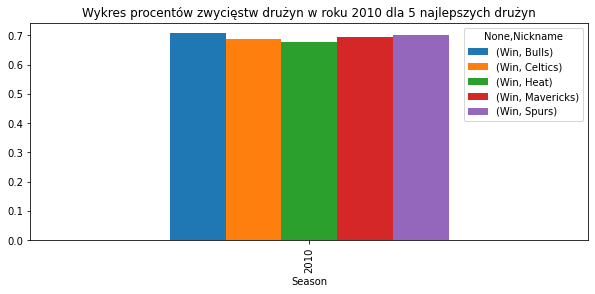

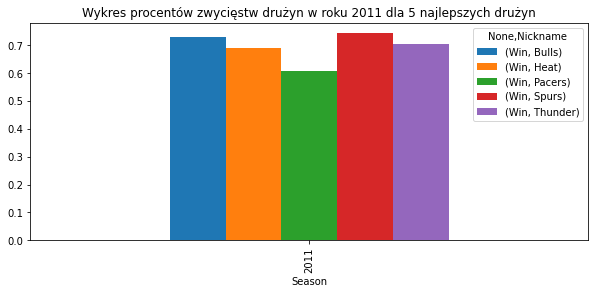

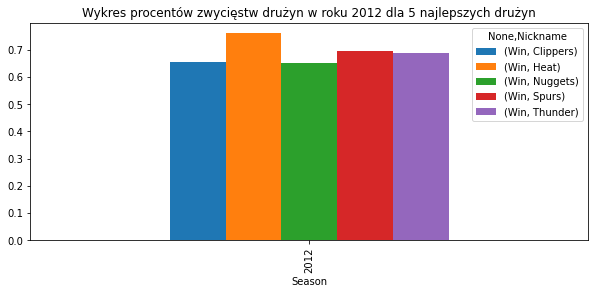

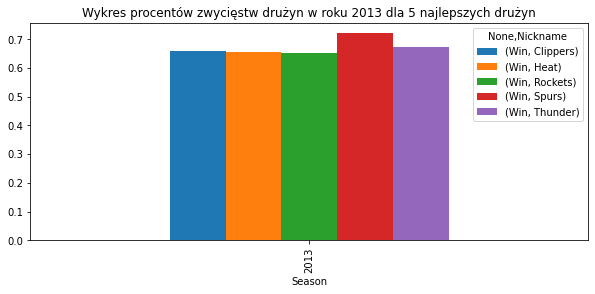

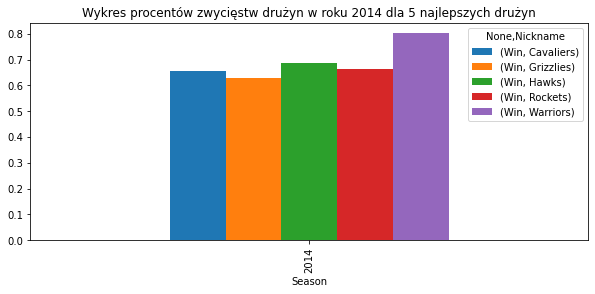

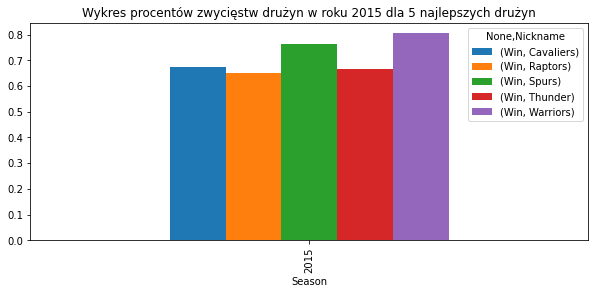

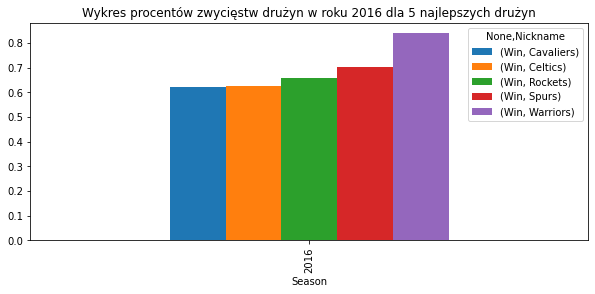

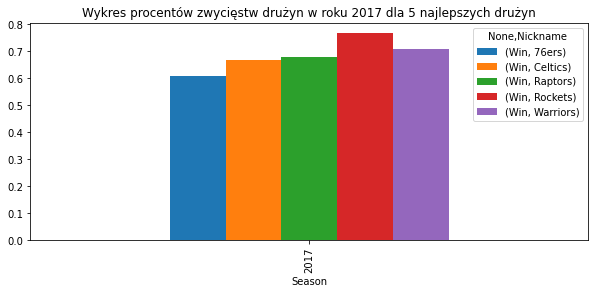

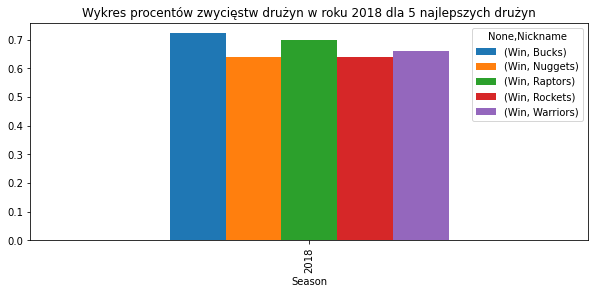

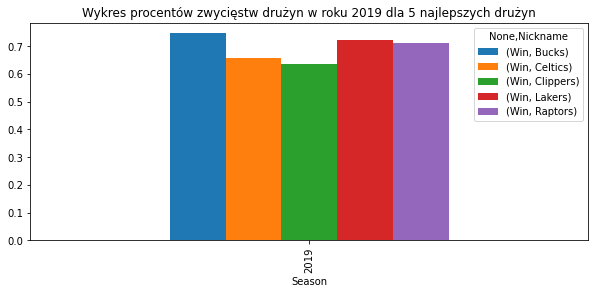

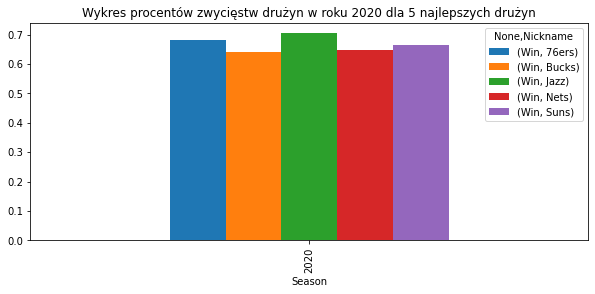

In [77]:
for y in years:
    best_n_teams_df[best_n_teams_df['Season']==y].set_index(['Season', 'Nickname']).unstack().plot(kind='bar', figsize=(10, 4), title=f'Wykres procentów zwycięstw drużyn w roku {y} dla {n_best} najlepszych drużyn')

## Obserwacje

Drużyny w zestawiu pojawiają się z różną częstością. Najczęściej pojawiał się Spurs (6 razy: 2010-2013, 2015-2016). Zaraz po nim drużyny Rockets (5 razy: 2013-2014, 2016-2018) oraz Warriors (5 razy: 2014-2018). Można wyróżnić jeszcze grupy, które miały większe powodzenie w pierwszej połowie zakresu sezonów: Heat (2010-2013), Thunder (2011-2013, 2015) oraz te, które później zaczęły odnotowywać lepsze wyniki: Raptors (2015, 2017-2019), Bucks (2018-2019).

# 2. Wyznaczyć średnią liczbę punktów uzyskanych podczas meczu przez każdą z drużyn w każdym sezonie.

In [78]:
mean_points_df = games_df[['Team_ID', 'Season', 'Points']]
mean_points_df.head()

,Team_ID,Season,Points
1076,1610612749,2020,105.0
1077,1610612756,2020,119.0
1078,1610612749,2020,109.0
1079,1610612749,2020,120.0
1080,1610612756,2020,118.0


In [79]:
mean_points_df = mean_points_df.merge(teams_df, on='Team_ID', how='inner')[['Nickname', 'Season', 'Points']]
mean_points_df.head()

,Nickname,Season,Points
0,Bucks,2020,105.0
1,Bucks,2020,109.0
2,Bucks,2020,120.0
3,Bucks,2020,123.0
4,Bucks,2020,125.0


In [80]:
mean_points_df = mean_points_df.groupby(['Season', 'Nickname']).mean()['Points']
mean_points_df = pd.DataFrame(mean_points_df)
mean_points_df

Points
Season Nickname                
2010   76ers          98.234043
       Bucks          92.211111
       Bulls          97.481132
       Cavaliers      95.292135
       Celtics        96.585859
...                         ...
2020   Suns          113.217822
       Thunder       104.883117
       Timberwolves  112.181818
       Warriors      113.417722
       Wizards       115.614458

[319 rows x 1 columns]

Analogicznie, przedstawimy wartości na wykresach dla n-najlepszych drużyn

In [81]:
mean_points_df.reset_index(inplace=True)

In [82]:
years = mean_points_df['Season'].unique()
years

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [83]:
n_best = 5
best_n_teams_df = pd.DataFrame()
for y in years:
    chosen_df = mean_points_df[mean_points_df['Season']==y]
    chosen_df = chosen_df.nlargest(n_best, 'Points')
    best_n_teams_df = pd.concat([best_n_teams_df, chosen_df])
    print(f'Top {n_best} drużyn dla roku {y}: ')
    print(chosen_df)
    print()

Top 5 drużyn dla roku 2010: 
    Season Nickname      Points
17    2010  Nuggets  107.105263
12    2010   Knicks  105.215054
22    2010  Rockets  105.188889
25    2010  Thunder  104.323810
24    2010     Suns  104.188889

Top 5 drużyn dla roku 2011: 
    Season Nickname      Points
46    2011  Nuggets  103.813333
52    2011    Spurs  103.085366
54    2011  Thunder  102.500000
30    2011    Bucks   98.750000
39    2011     Jazz   98.666667

Top 5 drużyn dla roku 2012: 
    Season Nickname      Points
80    2012  Rockets  105.421053
75    2012  Nuggets  105.010526
83    2012  Thunder  104.500000
81    2012    Spurs  102.422018
66    2012     Heat  101.079646

Top 5 drużyn dla roku 2013: 
     Season      Nickname      Points
109    2013       Rockets  107.873684
92     2013      Clippers  107.320388
113    2013  Timberwolves  106.715909
110    2013         Spurs  105.360360
112    2013       Thunder  104.906542

Top 5 drużyn dla roku 2014: 
     Season   Nickname      Points
143    2014 

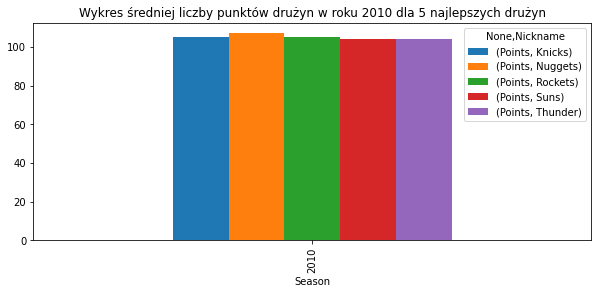

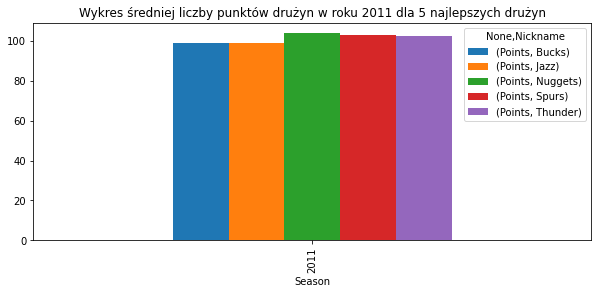

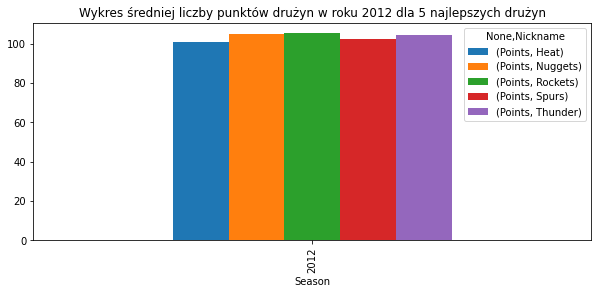

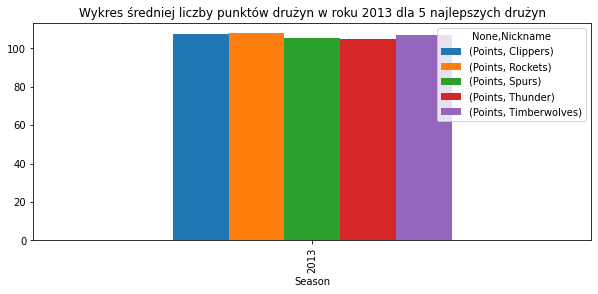

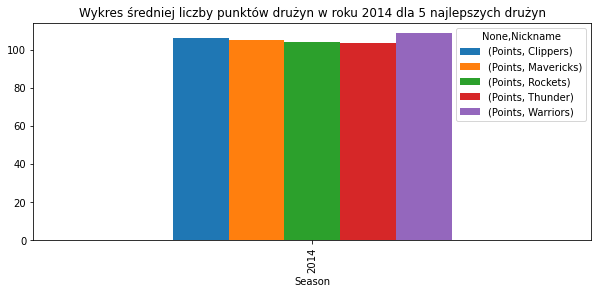

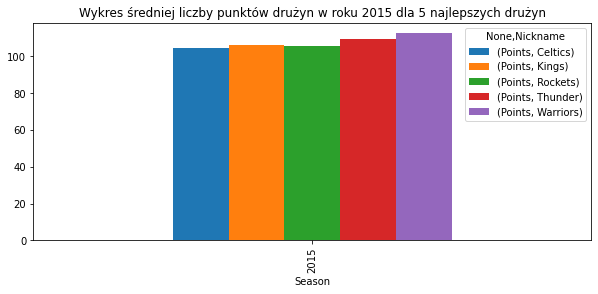

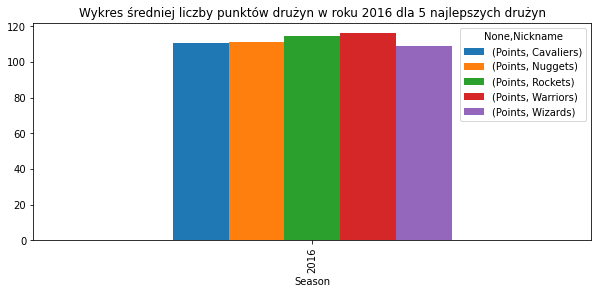

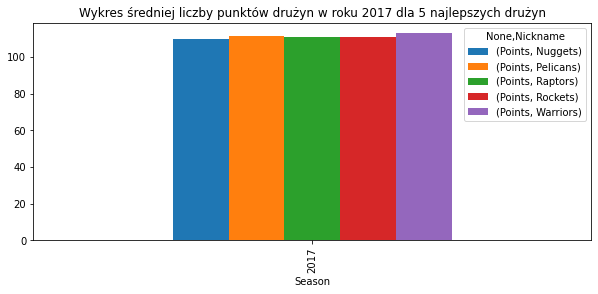

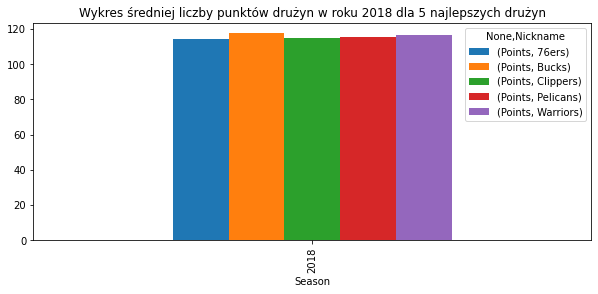

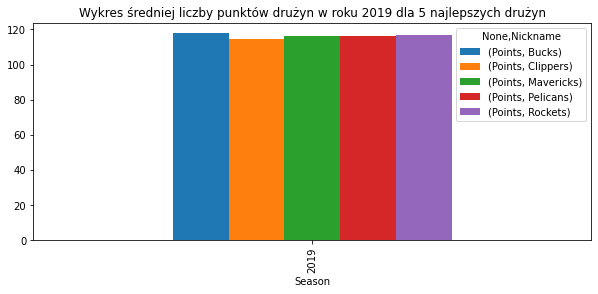

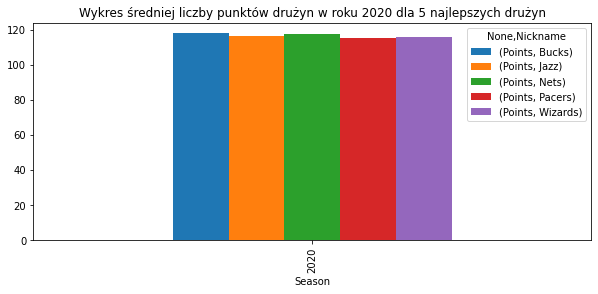

In [84]:
for y in years:
    best_n_teams_df[best_n_teams_df['Season']==y].set_index(['Season', 'Nickname']).unstack().plot(kind='bar', figsize=(10, 4), title=f'Wykres średniej liczby punktów drużyn w roku {y} dla {n_best} najlepszych drużyn')

## Obserwacje

W tych wynikach zauważamy większą różnorodność pojawianych się zespołów. Na początku wyróżnijmy te, które pojawiały się najczęściej: Rockets (8 razy 2010, 2012-2017, 2019), Thunder (6 razy 2010-2015), a także Warriors (5 razy 2014-2018) i Nuggets (5 razy 2010-2012, 2016-2017). Rockets i Nuggets na całym zakresie lat otrzymywali bardzo dobre wyniki. Natomiast Thunder i Spurs (3 razy, 2011-2013) tylko w pierwszej połowie, a Warriors, Bucks (4 razy 2011, 2018-2020) oraz Pelicans (3 razy 2017-2019) bardziej w drugiej.

# 3. Określić jak wiele urazów odnieśli zawodnicy w każdej z drużyn w ustalonym zakresie lat.

In [85]:
injuries_in_teams_df = injuries_df

In [86]:
injuries_in_teams_df['Injuries'] = 1

In [87]:
injuries_in_teams_df = injuries_in_teams_df.groupby(['Injury_year', 'Nickname']).count()
injuries_in_teams_df

Injuries
Injury_year Nickname              
2010        76ers               26
            Bucks               47
            Bulls               28
            Cavaliers           40
            Celtics             32
...                            ...
2020        Suns                49
            Thunder             62
            Timberwolves        20
            Warriors            44
            Wizards             40

[316 rows x 1 columns]

In [88]:
injuries_in_teams_df = injuries_in_teams_df.unstack().fillna(0).stack().reset_index()
injuries_in_teams_df

,Injury_year,Nickname,Injuries
0,2010,76ers,26.0
1,2010,Bucks,47.0
2,2010,Bulls,28.0
3,2010,Cavaliers,40.0
4,2010,Celtics,32.0
...,...,...,...
314,2020,Suns,49.0
315,2020,Thunder,62.0
316,2020,Timberwolves,20.0
317,2020,Warriors,44.0


In [89]:
years = injuries_in_teams_df['Injury_year'].unique()
years

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [90]:
n_best = 5
n_smallest_injuries_df = pd.DataFrame()
for y in years:
    chosen_df = injuries_in_teams_df[injuries_in_teams_df['Injury_year']==y]
    chosen_df = chosen_df.nsmallest(n_best, 'Injuries')
    n_smallest_injuries_df = pd.concat([n_smallest_injuries_df, chosen_df])
    print(f'Top {n_best} drużyn dla roku {y}: ')
    print(chosen_df)
    print()

Top 5 drużyn dla roku 2010: 
    Injury_year  Nickname  Injuries
19         2010  Pelicans       0.0
24         2010      Suns      15.0
12         2010    Knicks      18.0
23         2010     Spurs      19.0
11         2010     Kings      21.0

Top 5 drużyn dla roku 2011: 
    Injury_year  Nickname  Injuries
48         2011  Pelicans       0.0
31         2011     Bulls      22.0
42         2011    Lakers      25.0
40         2011     Kings      33.0
54         2011   Thunder      34.0

Top 5 drużyn dla roku 2012: 
    Injury_year   Nickname  Injuries
77         2012   Pelicans       0.0
64         2012  Grizzlies      47.0
82         2012       Suns      51.0
63         2012   Clippers      66.0
71         2012     Lakers      69.0

Top 5 drużyn dla roku 2013: 
     Injury_year   Nickname  Injuries
106         2013   Pelicans      23.0
96          2013    Hornets      29.0
111         2013       Suns      37.0
98          2013      Kings      50.0
102         2013  Mavericks      55.0

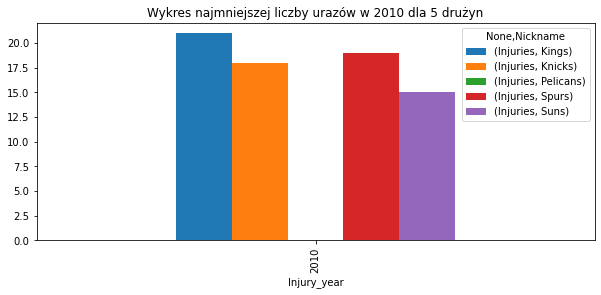

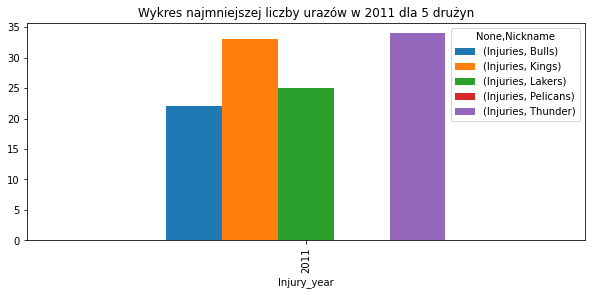

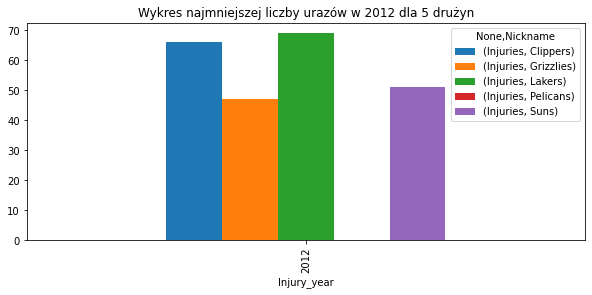

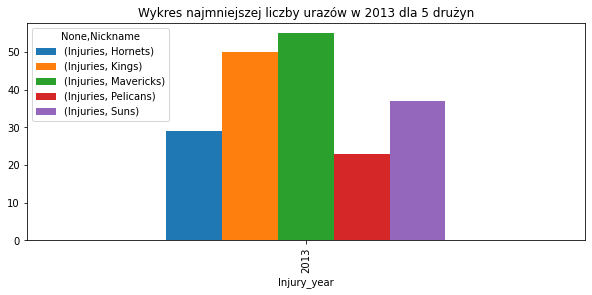

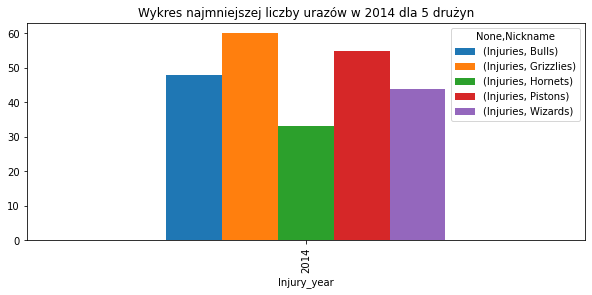

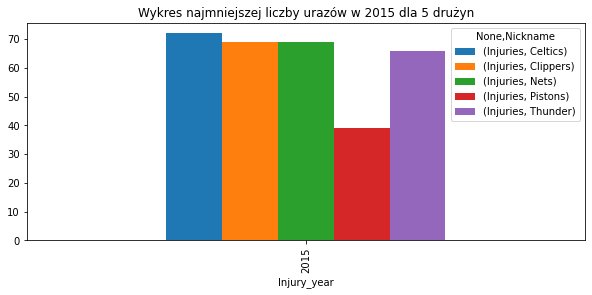

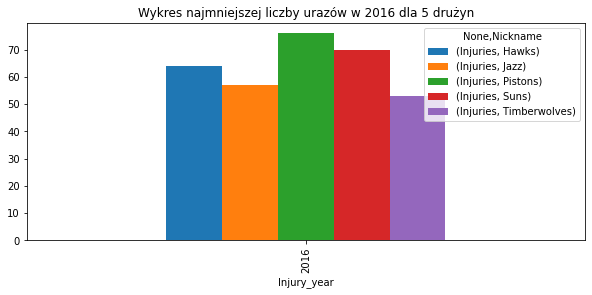

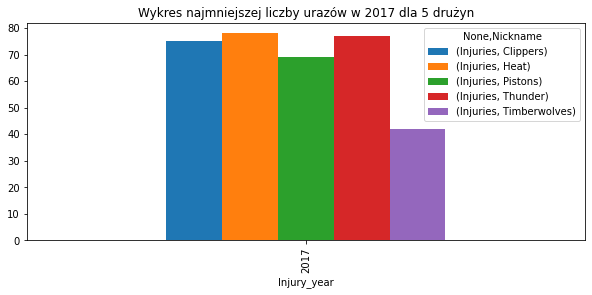

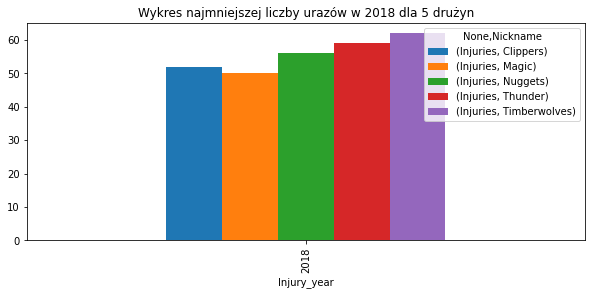

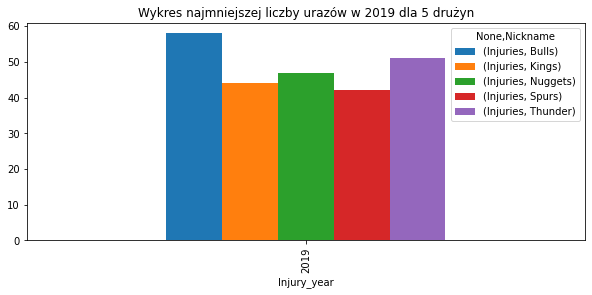

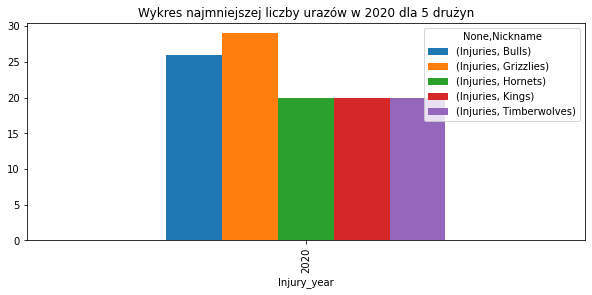

In [91]:
for y in years:
    n_smallest_injuries_df[n_smallest_injuries_df['Injury_year']==y].set_index(['Injury_year', 'Nickname']).unstack().plot(kind='bar', figsize=(10, 4), title=f'Wykres najmniejszej liczby urazów w {y} dla {n_best} drużyn')

## Obserwacje

W kwestii bezpiecznej gry należy wyróżnić zespoły Kings (5 razy 2010-2011, 2013, 2019-2020), Thunder (5 razy 2011, 2015, 2017-2019). Także drużyny, które cztery razy wystąpiły w zestawieniu: Pelicans, Pistons, Bulls, Clippers, Timberwolves oraz Suns. Po trzy wystąpienia miały również zespoły Grizzlies i Hornets.

# 4. Zliczyć ile razy drużyna posiadała trenera, który dostał się na tabelę trenera roku.

In [92]:
how_many_best_coach_df = coach_year_df[['Coach']]
how_many_best_coach_df.columns = ['Headcoach']
how_many_best_coach_df['Awards'] = 1
how_many_best_coach_df = how_many_best_coach_df.groupby('Headcoach').sum().reset_index()
how_many_best_coach_df

,Headcoach,Awards
0,Dwane Casey,1
1,Gregg Popovich,2
2,Mike Budenholzer,2
3,Mike D'Antoni,1
4,Nick Nurse,1
5,Scott Brooks,1
6,Steve Kerr,1


In [93]:
how_many_best_coach_df = teams_df.merge(how_many_best_coach_df, on='Headcoach', how='inner')[['Nickname', 'Awards']]
how_many_best_coach_df

,Nickname,Awards
0,Rockets,1
1,Bucks,2
2,Spurs,2
3,Raptors,1
4,Wizards,1
5,Pistons,1
6,Warriors,1


<AxesSubplot:title={'center':'Liczba nagród dla trenerów drużyn'}, xlabel='None,Nickname'>

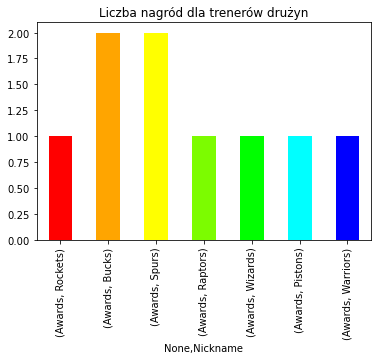

In [94]:
how_many_best_coach_df.set_index('Nickname').unstack().plot.bar(color=['red', 'orange', 'yellow', 'lawngreen', 'lime', 'cyan', 'blue'], title='Liczba nagród dla trenerów drużyn')

## Obserwacje

Widzimy, że trenerzy zespołów Bucks oraz Spurs zostali nagrodzeni dwa razy na przestrzeni lat 2010-2020. Dla drużyn Rockets, Raptors, Wizards, Pistons oraz Warriors ich trenerzy zostali nagrodzeni po jednym razie. Pozostałe zespoły nie miały takiego zaszczytu

# 5. Stworzyć zestawienie ile przypadało momentów dla każdej drużyny w każdym roku.

In [95]:
moments_per_team_df = top_moments_df[['Abbreviation', 'Moment_year']]
moments_per_team_df = moments_per_team_df.merge(teams_df, on='Abbreviation', how='inner')[['Nickname', 'Moment_year']]
moments_per_team_df['Count'] = 1
moments_per_team_df = moments_per_team_df.groupby(['Moment_year', 'Nickname']).sum()
moments_per_team_df

Count
Moment_year Nickname           
2013        76ers             1
            Heat              1
            Kings             1
            Mavericks         1
            Nets              1
...                         ...
2020        Suns             10
            Thunder          19
            Timberwolves     19
            Warriors         20
            Wizards          19

[89 rows x 1 columns]

In [96]:
moments_per_team_df = moments_per_team_df.unstack().fillna(0).stack().reset_index()
moments_per_team_df

,Moment_year,Nickname,Count
0,2013,76ers,1.0
1,2013,Bucks,0.0
2,2013,Bulls,0.0
3,2013,Cavaliers,0.0
4,2013,Celtics,0.0
...,...,...,...
111,2020,Suns,10.0
112,2020,Thunder,19.0
113,2020,Timberwolves,19.0
114,2020,Warriors,20.0


In [97]:
years = moments_per_team_df['Moment_year'].unique()
years

array([2013, 2014, 2019, 2020], dtype=int64)

In [98]:
n_best = 5
n_most_moments_df = pd.DataFrame()
for y in years:
    chosen_df = moments_per_team_df[moments_per_team_df['Moment_year']==y]
    chosen_df = chosen_df.nlargest(n_best, 'Count')
    n_most_moments_df = pd.concat([n_most_moments_df, chosen_df])
    print(f'Top {n_best} drużyn dla roku {y}: ')
    print(chosen_df)
    print()

Top 5 drużyn dla roku 2013: 
    Moment_year   Nickname  Count
0          2013      76ers    1.0
8          2013       Heat    1.0
11         2013      Kings    1.0
15         2013  Mavericks    1.0
16         2013       Nets    1.0

Top 5 drużyn dla roku 2014: 
    Moment_year Nickname  Count
54         2014  Thunder    3.0
37         2014     Heat    2.0
41         2014   Knicks    2.0
43         2014    Magic    2.0
45         2014     Nets    2.0

Top 5 drużyn dla roku 2019: 
    Moment_year Nickname  Count
75         2019  Nuggets   16.0
70         2019   Knicks   14.0
60         2019    Bulls   13.0
69         2019    Kings   13.0
59         2019    Bucks   12.0

Top 5 drużyn dla roku 2020: 
     Moment_year   Nickname  Count
100         2020     Lakers   45.0
95          2020       Heat   35.0
92          2020   Clippers   24.0
91          2020    Celtics   21.0
90          2020  Cavaliers   20.0



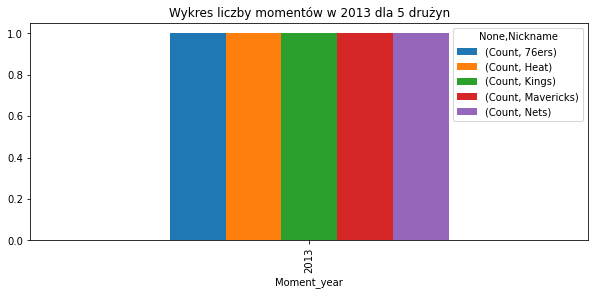

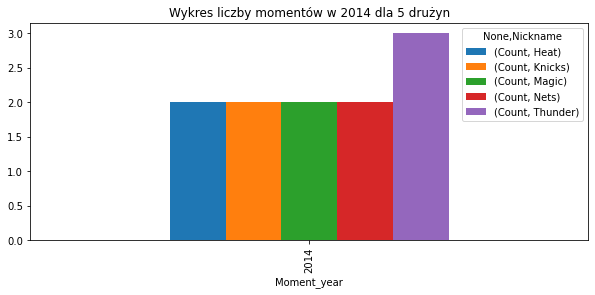

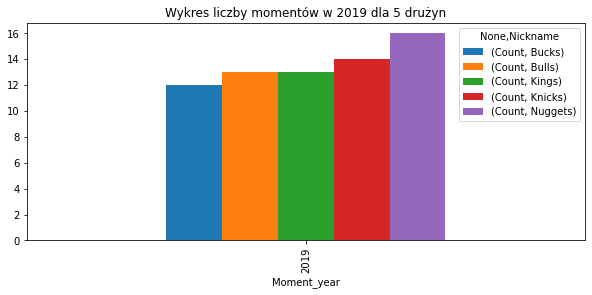

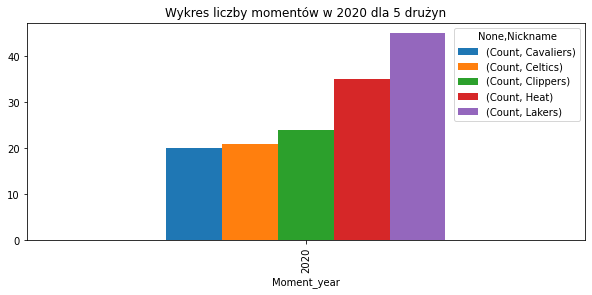

In [99]:
for y in years:
    n_most_moments_df[n_most_moments_df['Moment_year']==y].set_index(['Moment_year', 'Nickname']).unstack().plot(kind='bar', figsize=(10, 4), title=f'Wykres liczby momentów w {y} dla {n_best} drużyn')

## Obserwacje

Ze względu na małą liczbę momentów w przedziale 2013-2014 możemy pominąć ten okres i skupić się na latach 2019-2020. Największą liczbę momentów w tym okresie zgromadziła drużyna Lakers (45 w 2020). Tuż za nim Heat (35 w 2020), Clippers (24 w 2020), Cavaliers (20 w 2020), Celtics (21 w 2020) oraz Nuggets (16 w 2019). Dalej można tylko wymienić Knicks (14 w 2019), Kings (13 w 2019), Bulls (13 w 2019) oraz Bucks (12 w 2019).

# Wnioski

Porównując obserwacje w pierwszych dwóch pytaniach możemy zauważyć, że sporo drużyn się pokrywa. Spurs należał 6 razy do 5 drużyn z największym procentem zwycięstw, a także 3 razy miał jedną z największych średnich zdobytych punktów na mecz. Pokrywające się lata to 2011-2013. Następnie Rockets - 5 i 8 o wspólnych sezonach 2013-2014, 2016-2017. Warriors - po 5 razy w latach 2014-2018. Thunder jedynie w latach 2011-2013, Bucks w 2018-2019.

Łącząc te zespoły z tymi o najmniejszej liczbie urazów znajdziemy mało połączeń. Z wymienionych jedynie Thunder występuje w latach 2011, 2015 i 2017-2019. Jest jeden rok pokrywający się. Natomiast z tego można wywnioskować, że bezpieczne granie i dobre wyniki nie są ze sobą mocno związane. 

Sytuacja wygląda inaczej dla nagrodzonych trenerów. Zespoły Bucks i Spurs odniosły na tyle dobre wyniki, że ich trenerzy zostali nagrodzoni dwukrotnie w przedziale 2010-2020. Inne powtarzające się zespoły to Rockets i Warriors. Po jednej nagrodzie dla obu trenerów.

W ostatnim punkcie pojawił się tylko jeden powtarzający się zespół - Bucks. Momenty zagrań tej drużyny zostały bardzo docenione. W tym punkcie rozważamy zakres lat 2018-2020 co może tłumaczyć dlaczego tylko ta drużyna się pojawiła. Pozostałe osiągnięcia zespołów odbywały się przed tym okresem.

Podsumowując analizę, możemy określić, że najefektywniejszymi zespołami w latach 2010-2020 były Spurs, Rockets, Warriors, Thunder i Bucks spośród 29 branych pod uwagę. Do lat 2010-2015 możemy zakwalifikować przede wszystkim Thunder, ale też Spurs. Do 2015-2020 drużyny Warriors, Bucks. Za to zespół Rockets mieści się w środku zakresu 2013-2017.